#SVM classifier on Employee Attrition

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
import seaborn as sns

In [17]:
data= pd.read_csv('preprocesseddata.csv')
data.head(8)

,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Dept-Human Resouces,Dept-Research & Development,Dept-Sales,EducationField-Human Resources,EducationField-Life Sciences,EducationField-Marketing,EducationField-Medical,EducationField-Other,EducationField-Technical Degree,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
0,41,1,2,1,2,2,0,3,2,4,1,5993,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,49,0,3,8,1,3,1,2,2,2,3,5130,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,37,1,2,2,2,4,1,2,1,3,1,2090,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,33,0,3,3,4,4,0,3,1,3,3,2909,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,27,0,2,2,1,1,1,3,1,2,3,3468,9,0,12,3,4,1,6,3,3,2,2,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,32,0,3,2,2,4,1,3,1,4,1,3068,0,0,13,3,3,0,8,2,2,7,7,3,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6,59,0,2,3,3,3,0,4,1,1,3,2670,4,1,20,4,1,3,12,3,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
7,30,0,2,24,1,4,1,3,1,3,2,2693,1,0,22,4,2,1,1,2,3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [18]:
print(data.shape)

(1470, 43)


In [5]:
X = data.iloc[:, 2:43].values
Y = data.iloc[:, 1].values

In [8]:
X=np.hstack((np.array(data.iloc[:,0]).reshape(-1,1),X))

### Split dataset 80-20

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

### Various kernals applied

In [10]:
classifier1 = SVC(kernel = 'poly', random_state = 0)
classifier2 = SVC(kernel = 'rbf', random_state = 0)
classifier3 = SVC(kernel = 'linear', random_state = 0)

classifier1.fit(X_train, Y_train)
classifier2.fit(X_train, Y_train)
classifier3.fit(X_train, Y_train)

Y_predpoly = classifier1.predict(X_test)
Y_predrbf = classifier2.predict(X_test)
Y_predlinear = classifier3.predict(X_test)

In [12]:
print(classification_report(Y_test, Y_predpoly))
print(classification_report(Y_test, Y_predrbf))
print(classification_report(Y_test, Y_predlinear))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       245
           1       0.69      0.18      0.29        49

    accuracy                           0.85       294
   macro avg       0.77      0.58      0.60       294
weighted avg       0.83      0.85      0.81       294

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       245
           1       0.82      0.18      0.30        49

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       245
           1       0.72      0.43      0.54        49

    accuracy                           0.88       294
   macro avg       0.81      0.70      0.73       294
weighted avg       0.87      0.88      0.86       294



In [20]:
print(f1_score(Y_test,Y_predpoly))
print(f1_score(Y_test,Y_predrbf))
print(f1_score(Y_test,Y_predlinear))

0.2903225806451613
0.3
0.5384615384615385


###Corelation Heat-Map and Features-Importance

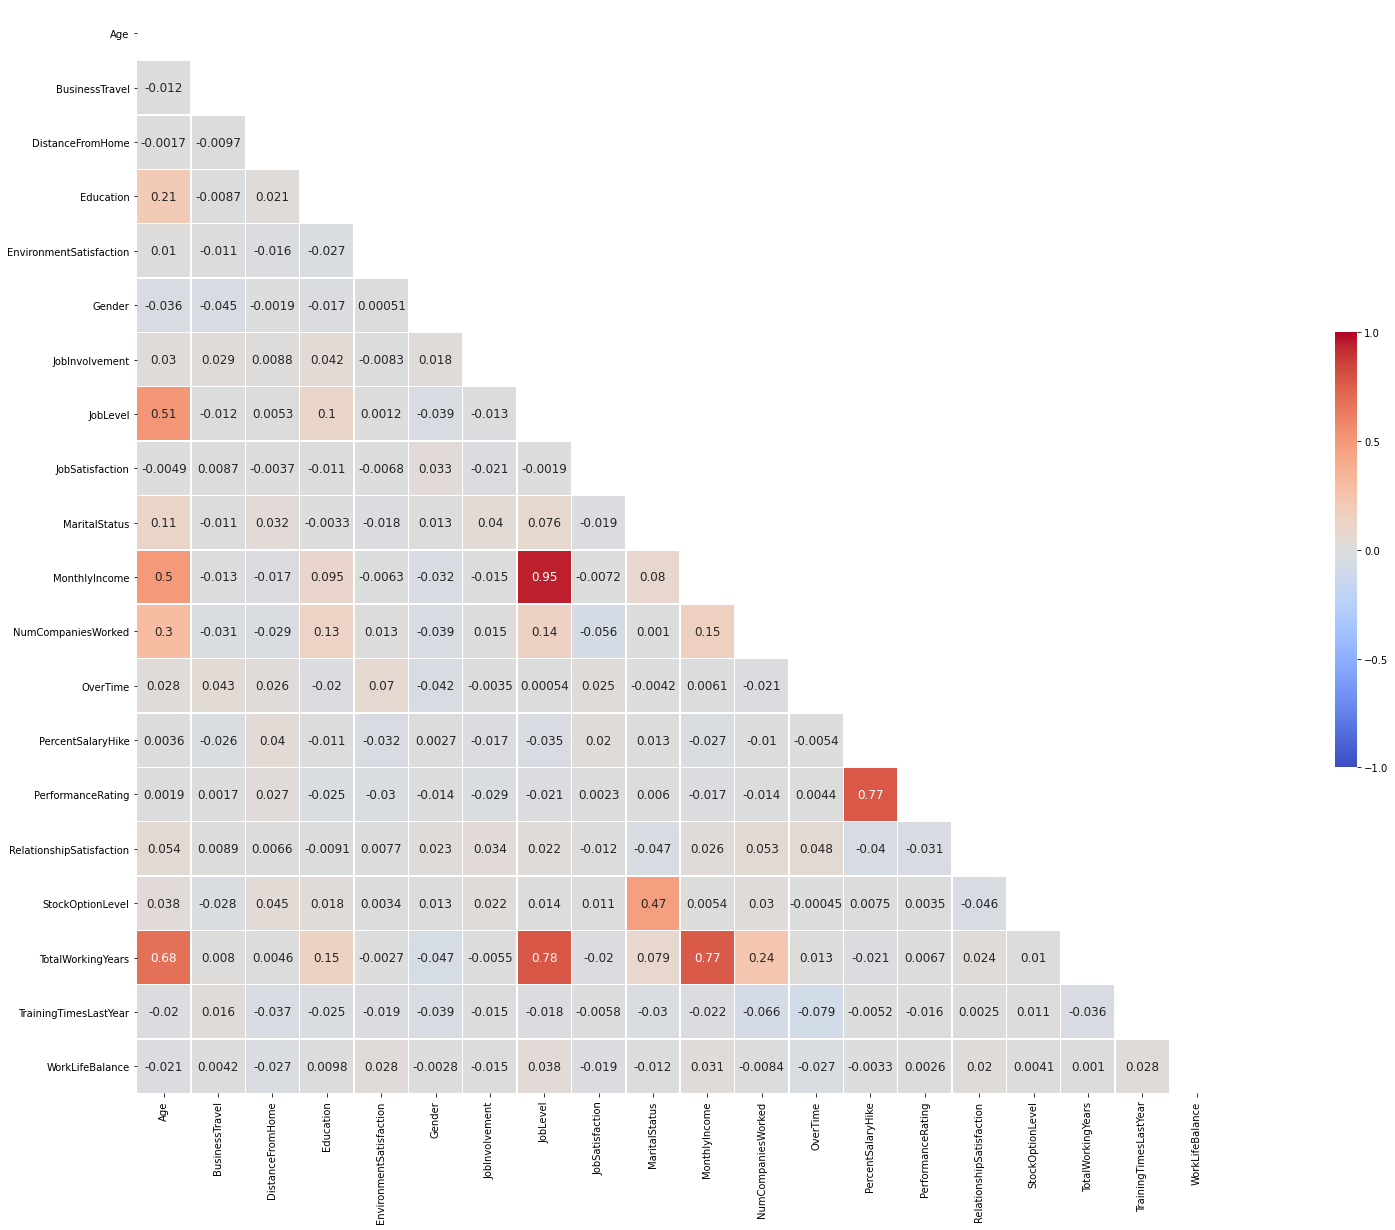

In [61]:
temp=data.drop(['Attrition'],axis=1)
corr_matrix=temp.iloc[:,0:20].corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(40, 20))

heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
ax.set_yticklabels(temp.iloc[:,0:25].columns, rotation = 0)
ax.set_xticklabels(temp.iloc[:,0:25].columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

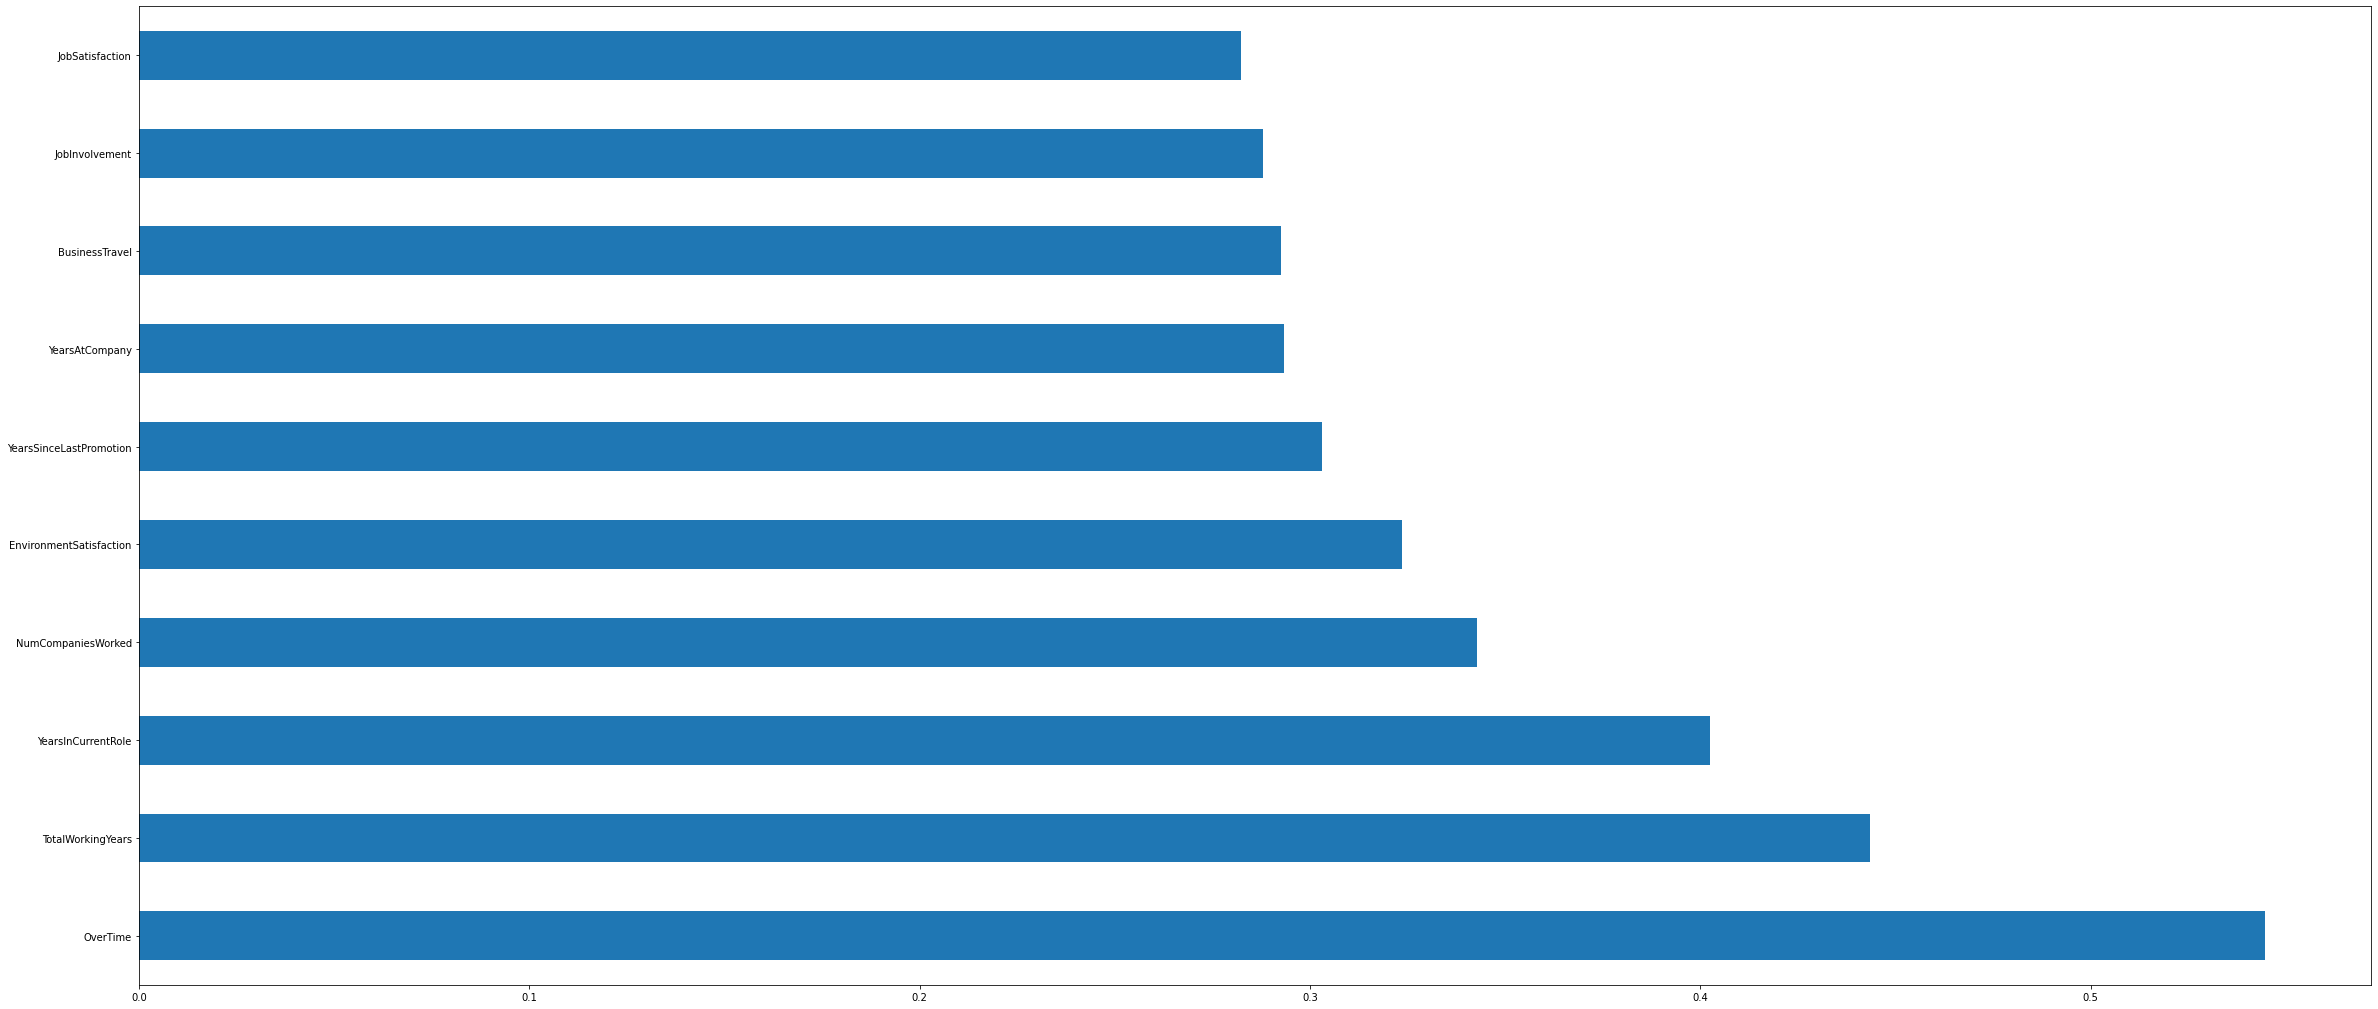

In [57]:
f, ax = plt.subplots(figsize=(40, 18))
pd.Series(abs(classifier3.coef_[0]), index=temp.columns).nlargest(10).plot(kind='barh')